In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential

In [8]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [9]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog',
         'horse','ship','truck']

##### Create AlexNet Architecture

In [12]:
model = Sequential()

model.add(Input(shape=(32,32,3)))
model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), 
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,824,266 (6.96 MB)

 Trainable params: 1,821,962 (6.95 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [14]:
from tensorflow.keras.utils import plot_model

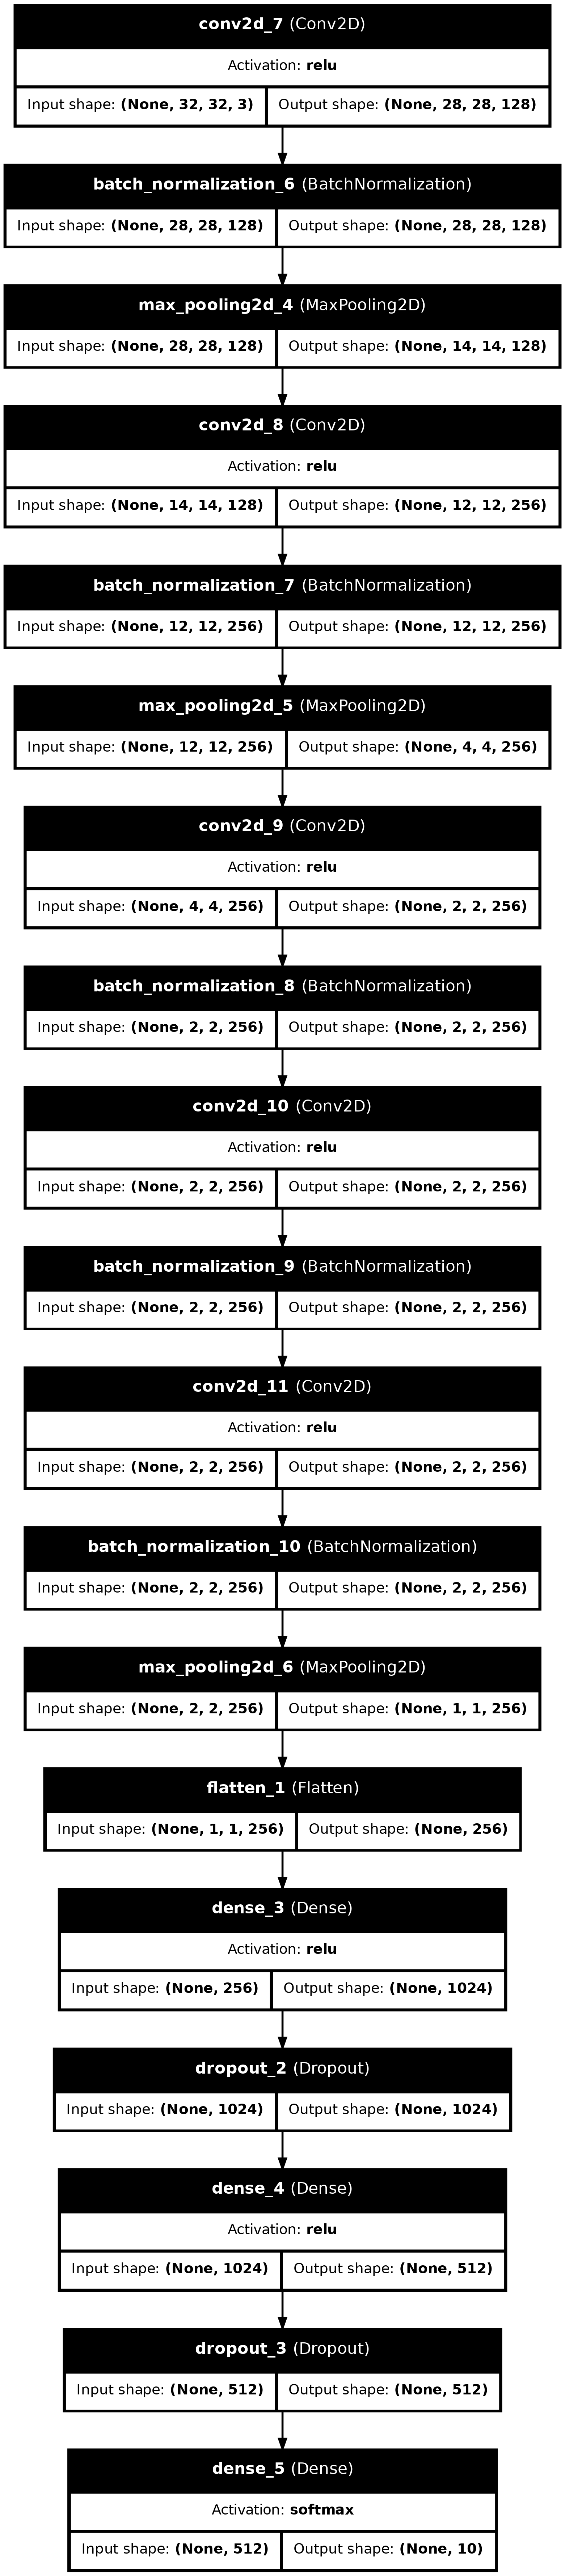

In [17]:
plot_model(model, show_layer_activations=True, show_shapes=True, 
           show_layer_names=True)

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 122ms/step - accuracy: 0.5062 - loss: 1.3969 - val_accuracy: 0.3918 - val_loss: 1.6624
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 121ms/step - accuracy: 0.5925 - loss: 1.1811 - val_accuracy: 0.6057 - val_loss: 1.1495
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.6536 - loss: 1.0310 - val_accuracy: 0.5038 - val_loss: 1.4331
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - accuracy: 0.6947 - loss: 0.9200 - val_accuracy: 0.6975 - val_loss: 0.8984
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 124ms/step - accuracy: 0.7165 - loss: 0.8421 - val_accuracy: 0.7158 - val_loss: 0.8461
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 122ms/step - accuracy: 0.7540 - loss: 0.7403 - val_accuracy: 0.6392 - val_loss: 1.1132
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.7741 - loss: 0.6754 - val_accuracy: 0.7002 - val_loss: 0.8759
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 126ms/step - ac

###### Plot the history

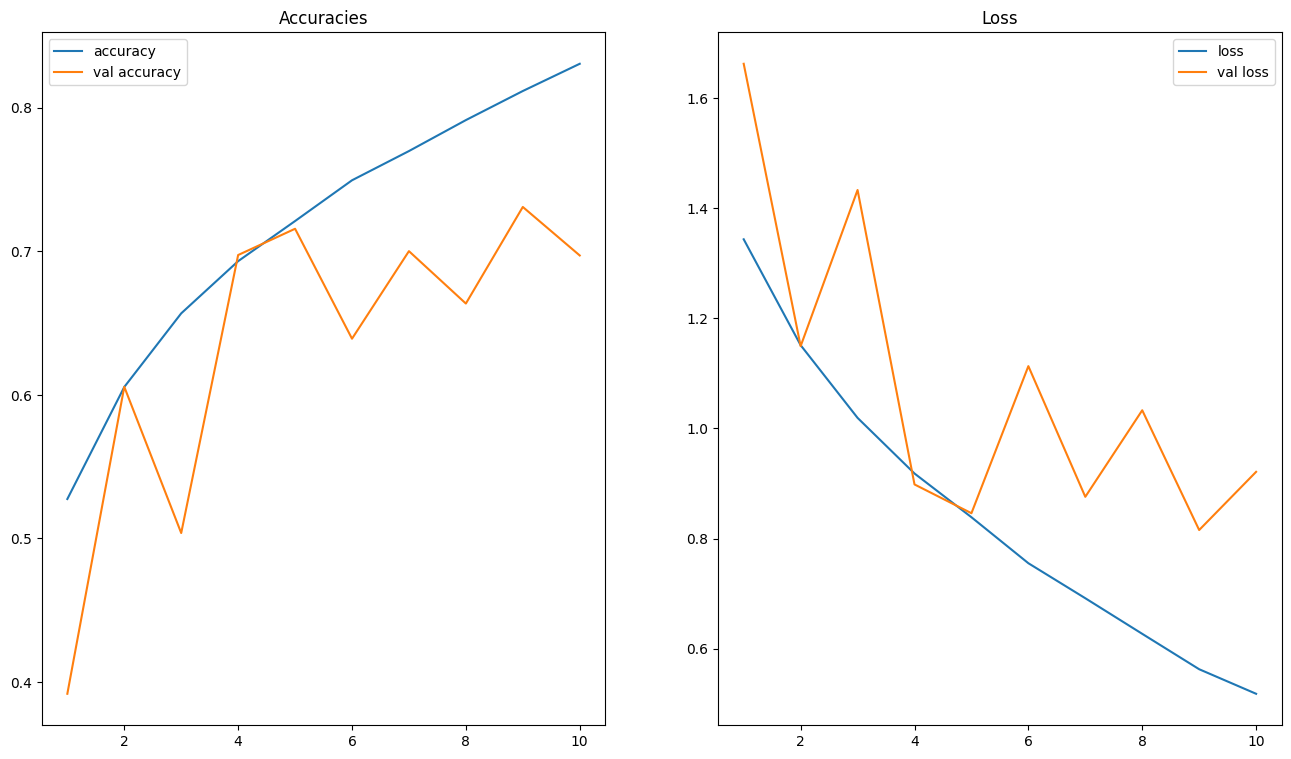

In [29]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Accuracies')
plt.plot(range(1,11), history.history['accuracy'], label = 'accuracy')
plt.plot(range(1,11), history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss')
plt.plot(range(1,11), history.history['loss'], label = 'loss')
plt.plot(range(1,11), history.history['val_loss'], label = 'val loss')
plt.legend()